# Names and IDs
 1. Yuval Levi - 325120384
 2. Maxim Katz - 322406604

# I. Condorcet's Jury Theorem (1785) (15 points)

Assume voter probability to be correct as $p>.5$.

1. Plot the probability a jury of $n$ voters (odd) is correct as a function of $p$ for different $n$ using Monte-Carlo simulations (sampling and averaging).

2. Prove that as number of jury members grows, $n\rightarrow\infty$, the  jury majority becomes correct  $\Pr(\text{correct}) \rightarrow 1$ (**hint**: use the law of large numbers).

Notes: Avoid loops where possible.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

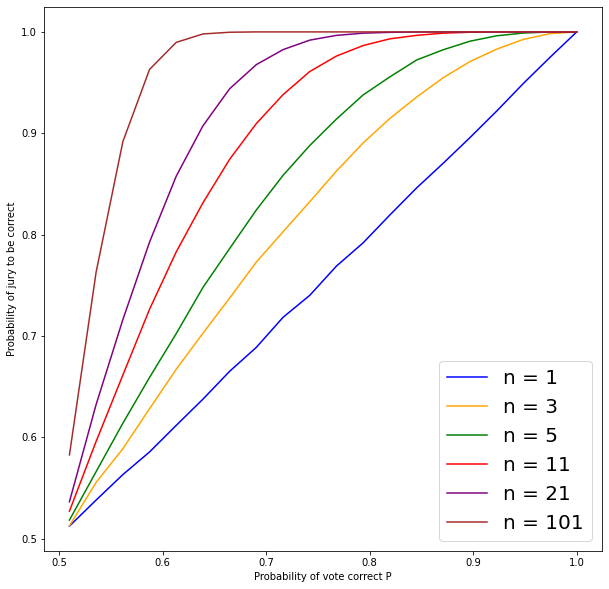

In [ ]:
def jury_probability(n, p):
    size = 100000
    smpl = np.random.binomial(n, p, size)
    prob = [x/n for x in smpl]
    smpl_arr = [1 for i in range(len(prob)) if prob[i]>0.5]
    smpl_avg = sum(smpl_arr)/size
    return smpl_avg
    
colors = ['blue','orange','green','red','purple','brown']
n = [1,3,5,11,21,101]
votes= np.linspace(0.51,1,20)
fig = plt.figure(figsize= (10,10))
ax = plt.axes()

for i in n:
  jury = []
  for pr in votes:
    jury.append(jury_probability(i, pr))
  ax.plot(votes ,jury, colors[n.index(i)])
  
plt.gca().legend(('n = 1','n = 3','n = 5','n = 11','n = 21','n = 101'), loc=4, prop={'size': 20})
plt.xlabel('Probability of vote correct P')
plt.ylabel('Probability of jury to be correct')
plt.show()

**Proof:**

We can use the law of large numbers to prove Condorcet's Jury Theorem as follows:

Let X be a random variable representing the number of group members who correctly assess the truth of a proposition. We can then define the following:

p: the probability that a single member of the group correctly assesses the truth of the proposition

n: the size of the group

m: the number of group members required to form a majority (m = ceil(n/2))

Since each member of the group independently and correctly assesses the truth of the proposition with probability p, the distribution of X is binomial with parameters n and p. The expected value of this distribution is E[X] = np. When will assume that the correct choice is +1 without the loss of generality and the wrong choice is -1.

when p > 0.5 let `a = p-0.5 > 0` and `1-a = 0.5-p` we can get that:

E = 1*p - 1*(1-p) = 1*(q+0.5) - 1*(1-(0.5+q)) = 2q > 0 

By the law of large numbers, as n increases, the sample mean X/n = (X/n - E[X]/n) + E[X]/n approaches E[X]/n = p. This means that as the size of the group increases, the fraction of group members who correctly assess the truth of the proposition approaches p.

Since p > 1/2, as n increases, the fraction of group members who correctly assess the truth of the proposition approaches 1:

lim(P(|Xn-E|<e)) ->  1 , n -> infinity

From the placement we arrive that:

lim(P(|Xn-2q|<2q)) -> 1 , n -> infinity

This means that the probability that the majority of the group correctly assesses the truth of the proposition approaches 1 as well, which is what we wanted to prove:
P(Xn>0) >= P(|Xn-2q|<2q) -----> lim(P(Xn>0)) -> 1


# II. AdaBoost (35 points)
* Use `AdaBoostClassifier` model from sklearn.ensemble to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` from sklearn.svm) with the next parameters:
        - *tol=1e-5,loss='hinge', C=1e5, max_iter=1e6*
    - Split the sample set into 2/3rd train set and 1/3 test set.
    - Train ensemble classifiers where each has a different number of estimators $n\in \{1, 3, 10, 50, 100, 1000, 10000\}$.
    - Use the given function plot_data or your own function to plot the final decision plane of each ensemble model.

* Answer to the next questions:

 1. How does the overall train set accuracy change with $n$?
 2. Does your model start to overfit at some point? How can you test and detect such a point?
 3. For this specific task, what is the optimal number of estimators? Hint: use `estimator_errors_` attribute.

 ---
 **Note:** 
 * Explain you results in text and support it with figures.

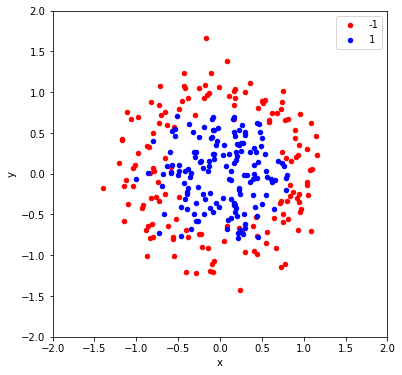

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=300, noise=0.2, random_state=101, factor=0.5)
y = y*2 - 1
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {-1:'red', 1:'blue'}
fig, ax = plt.subplots(figsize=(6,6))
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()

In [ ]:
def plot_data(X, y, h, ax):
    '''Plotting function. The function will plot the given instances as well will color the
    background according to the decision boundaries of the model.
    X - 2D array
    y - Vector of labels
    h - A function which accepts X and returns the predicted labels. It should be based on the trained model.
    ax - axes.Axes object as returned by matplotlib.pyplot.subplots function.'''
    def make_meshgrid(x, y, h=.01):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        return xx, yy
  
    def plot_contours(ax, clf, xx, yy, **params):
        Z = h(np.c_[xx.ravel(), yy.ravel()])  # predictions
        Z = Z.reshape(xx.shape)
        if 'levels' in params and len(params['levels'])<2:
          out = ax.contour(xx, yy, Z, **params, colors='k', edgesize=10)
        else:
          out = ax.contourf(xx, yy, Z, **params)
        return out
  
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x0=X[:,0], x1=X[:,1], label=y))
    colors = {-1:'red', 1:'blue'}
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x0', y='x1', 
                 alpha=0.5, label=key, color=colors[key])
  
    # decision boundary
    xx1, xx2 = make_meshgrid(X[:,0], X[:,1])
    plot_contours(ax, h, xx1, xx2, alpha=0.2)#, levels=[0.5])
  
    ax.axis('scaled')

#### Answer


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

svc = LinearSVC(tol=1e-5,loss='hinge', C=1e5, max_iter=1e6)
n = [1, 3, 10, 50, 100, 1000, 10000]

ensemble_mod = []

for s in n:
  ada_yonat = AdaBoostClassifier(base_estimator = svc, n_estimators = s, algorithm='SAMME')
  ensemble_mod.append(ada_yonat.fit(x_train, y_train))

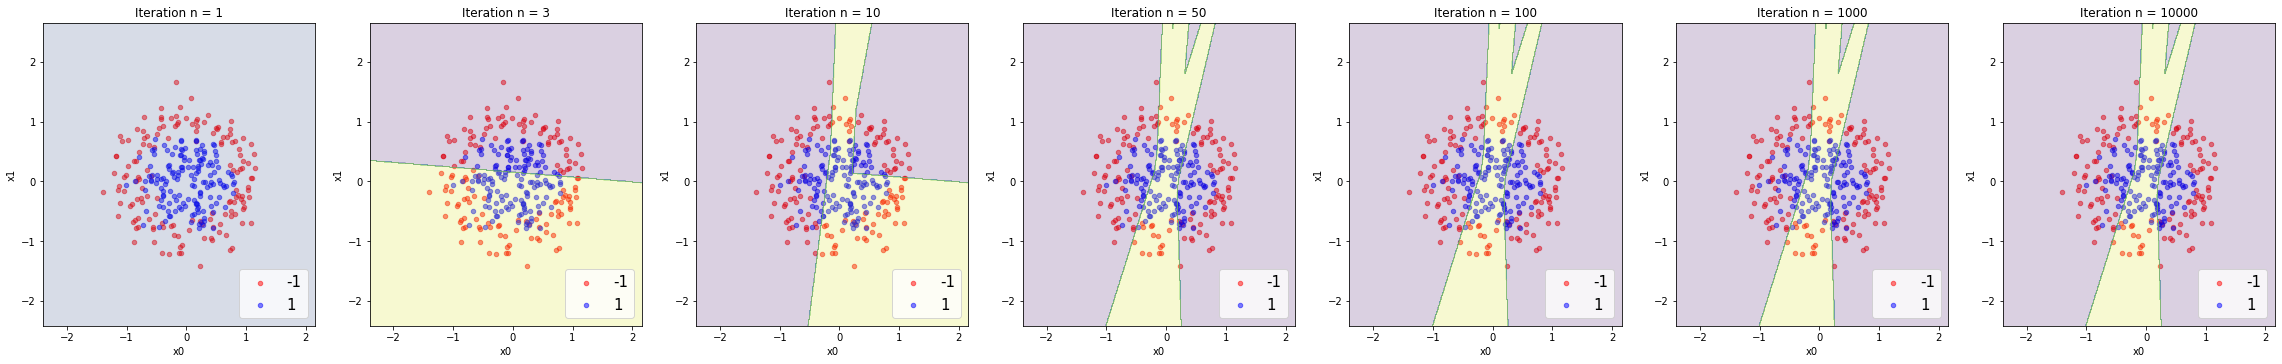

In [ ]:
fig,ax = plt.subplots(1,7, figsize = (40,40))

for i in range(len(n)):
  plot_data(X, y, ensemble_mod[i].predict, ax[i])
  ax[i].set_title('Iteration n = '+ str(n[i]))
  ax[i].legend(loc=4, prop={'size': 15})

**1. How does the overall train set accuracy change with $n$?**

In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [ ]:
acc = []

for mod in ensemble_mod:
  pred = mod.predict(x_train)
  acc.append(accuracy_score(y_train, pred))

print("Accuracy for each n:")
for i in range(len(acc)):
  print("Accuracy for n = " + str(n[i]) + ": " + str(acc[i]))

Accuracy for each n:
Accuracy for n = 1: 0.5174129353233831
Accuracy for n = 3: 0.527363184079602
Accuracy for n = 10: 0.6169154228855721
Accuracy for n = 50: 0.6467661691542289
Accuracy for n = 100: 0.6467661691542289
Accuracy for n = 1000: 0.6467661691542289
Accuracy for n = 10000: 0.6467661691542289


**Explanation:** 

As we can see, while we increase the number of estimators (n grows) in our ensemble model we recieve better accuracy score, until we reach num. of estimators limit where we get the same accuray level for the model with higher number of estimators. We can see an exponantional function that the limit is Accuracy = 0.646 and from n = 50 the models doesn't improve in the accuracy score and stays the same.

 **2. Does your model start to overfit at some point? How can you test and detect such a point?**

In [ ]:
tst_acc = []
for mod in ensemble_mod:
  tst_pred = mod.predict(x_test)
  tst_acc.append(accuracy_score(y_test, tst_pred))
print("Accuracy of train set and test set for each n:")
for i in range(len(acc)):
  print("n = " + str(n[i]) + ": Accuracy of train set => " + str(np.round(acc[i], 3)) + " | Accuracy of test set => " + str(np.round(tst_acc[i], 3)))

Accuracy of train set and test set for each n:
n = 1: Accuracy of train set => 0.517 | Accuracy of test set => 0.465
n = 3: Accuracy of train set => 0.527 | Accuracy of test set => 0.545
n = 10: Accuracy of train set => 0.617 | Accuracy of test set => 0.576
n = 50: Accuracy of train set => 0.647 | Accuracy of test set => 0.596
n = 100: Accuracy of train set => 0.647 | Accuracy of test set => 0.596
n = 1000: Accuracy of train set => 0.647 | Accuracy of test set => 0.596
n = 10000: Accuracy of train set => 0.647 | Accuracy of test set => 0.596


From here, We can see that is not a big difference between the accuracy of the train and the accuracy of the test. Therefore, the model is not overfit at some point.

We would like to plot the Error Rate both the train and the test for a better visualization and understanding:

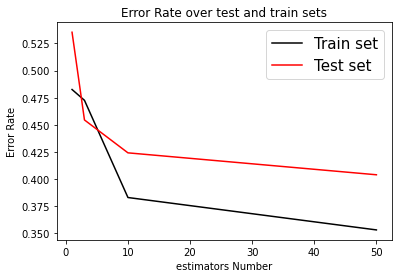

In [ ]:
tr_err, tst_err = [], []
for i in range(len(acc)):
  tr_err.append(1-acc[i])
  tst_err.append(1-tst_acc[i])

plt.plot(n[:4], tr_err[:4], label = 'Train set', color = 'Black')
plt.plot(n[:4], tst_err[:4], label = 'Test set', color = 'Red')
plt.xlabel('estimators Number')
plt.ylabel('Error Rate')
plt.title('Error Rate over test and train sets')
plt.legend(prop={'size': 15})

plt.show()


As we can see from the plot, The error rate of the training set of a model converges close to that of the error rate of the test set and doesn't get higher. Hence, **the model do not tend to overfit**.
There is more error in test set but it doesn't say about overfit.

***Explanation of the idea of overfit:***

As we studied in class and labs, a model tend to overfit when the model learn the data too well resulting high accuracy score of the training data and low accuracy score for the test data. 

In addition, the error both of the training set and the test set converge to same value but at some point the error of the testing data goes higher and moves away from the error value of the training set that stays the same. 
This behavior can be shown in the next picture:
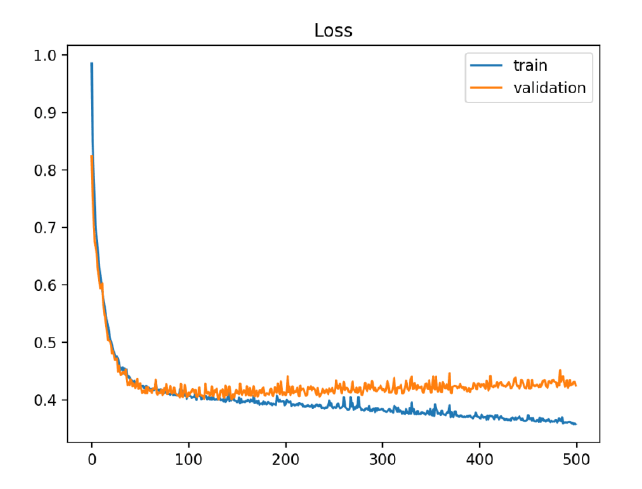

In our model, we can see that this situation doesn't exist and the difffence of the errors between the train and test data is not so big, also the trainig set accuracy level didn't recieved too good score.

Our assumption is that AdaBoost model is robust to overfitting because we use a combination of weak learners (linear svc models for each AdaBoost model). If we would want to ensure our model is not overfitting we would use a k-fold cross - validation and check the results to tune the model be less adjusted to the training set.

 **3. For this specific task, what is the optimal number of estimators?**

We will use the *estimator_errors_* attribute (returns classification error for each estimator in the boosted ensemble) to calculate the number of correct estimators:

In [ ]:
print("Number of correct estimators for each n:")
for i in range(len(ensemble_mod)):
  correct = len(ensemble_mod[i].estimator_errors_[ensemble_mod[i].estimator_errors_ < 1])
  print("n = " + str(n[i]) + " ==> " + str(correct))


Number of correct estimators for each n:
n = 1 ==> 1
n = 3 ==> 3
n = 10 ==> 10
n = 50 ==> 19
n = 100 ==> 19
n = 1000 ==> 19
n = 10000 ==> 19


**Explanation:**

In order to find the optimal estimators, for each $n\in \{1,3,10,50, 100, 1000, 10000\}$ we counted the optimal number of correct estimators from our model. Correct estimator is estimator that the error rate is staying below 50%.

We can see that for $n\in \{1, 3, 10\}$ all estimators were correct, so we can say that the optimal amount of estimators is the total number of estimators.
for $n\in \{50, 100, 1000, 10000\}$ the number of correct estimators is 19, so we can say that **the optimal number of estimators is 19**.


---
# Section 2 - Kaggle competition
---

# miRNA animals interaction prediction (50 pts + 10 pts)
In this section, you will explain the tools and methods you used in the competition. Fifty points will be given according to the explanations of the section and up to ten additional points according to your relative position in the competition. Participate in the following contest and answer the following questions:
https://www.kaggle.com/t/3c2cb35d174c287b7fcaf1c716f523ef





### EDA - Exploratory Data Analysis (10 pts):
Use any visual tools to present and explain the data. Your answer must include statistics, images, and conclusions. 

***Write your code below***


In [ ]:
import numpy as np
import pandas as pd
import io
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
# upload kaggle.json file using user prompt
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

# download the dataset
!kaggle competitions download -c mirna-cross-species-prediction

# # extract the files
!unzip '/content/mirna-cross-species-prediction.zip'

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes
 89% 38.0M/42.6M [00:00<00:00, 202MB/s]
100% 42.6M/42.6M [00:00<00:00, 197MB/s]
Archive:  /content/mirna-cross-species-prediction.zip
  inflating: sub.csv                 
  inflating: x_test.csv              
  inflating: x_train.csv             
  inflating: y_train.csv             


In [ ]:
x_train = pd.read_csv('/content/x_train.csv')
x_test = pd.read_csv('/content/x_test.csv')
y_train = pd.read_csv('/content/y_train.csv')

**Showing the first five rows of the dataset**

In [ ]:
x_train.head()

,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_Total_target_bulge,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge
0,0,0.009997,0.286680,0.071469,0.030892,0.028100,0.027835,NaN,0.020861,0.011003,...,0.0,4.0,3.0,1.0,3.0,3.0,0.0,2.0,NaN,0.0
1,1,0.256987,0.263582,0.255437,0.246667,0.247228,0.249358,0.248635,0.249442,0.250728,...,NaN,3.0,3.0,NaN,NaN,NaN,0.0,NaN,NaN,1.0
2,2,0.318176,NaN,0.973395,NaN,NaN,0.337735,NaN,0.316446,NaN,...,1.0,0.0,0.0,1.0,10.0,10.0,0.0,NaN,3.0,1.0
3,3,NaN,0.687934,NaN,0.688786,NaN,NaN,0.692787,0.690106,0.670033,...,0.0,5.0,NaN,1.0,2.0,2.0,NaN,1.0,2.0,0.0
4,4,NaN,NaN,0.956451,0.938652,0.929122,NaN,NaN,0.032907,0.016511,...,NaN,1.0,3.0,1.0,0.0,0.0,NaN,0.0,NaN,1.0


**Counting how many Null values there is in every column**

*1. In the training data:*

In [ ]:
x_train.isna().sum()

id                                          0
Acc_P10_10th                             2736
Acc_P10_1th                              2736
Acc_P10_2th                              2711
Acc_P10_3th                              2735
                                         ... 
miRNAPairingCount_X3p_bulge_nt           2719
miRNAPairingCount_X3p_bulge_target_nt    2723
miRNAPairingCount_X3p_mir_bulge          2754
miRNAPairingCount_X3p_mismatch           2704
miRNAPairingCount_X3p_target_bulge       2682
Length: 593, dtype: int64

*2. In the testing data:*

In [ ]:
x_test.isna().sum()

id                                          0
Acc_P10_10th                             6901
Acc_P10_1th                              7216
Acc_P10_2th                              6982
Acc_P10_3th                              7006
                                         ... 
miRNAPairingCount_X3p_bulge_nt           6974
miRNAPairingCount_X3p_bulge_target_nt    7026
miRNAPairingCount_X3p_mir_bulge          6926
miRNAPairingCount_X3p_mismatch           7000
miRNAPairingCount_X3p_target_bulge       6999
Length: 593, dtype: int64

*3. Missing labels in the training data:*

In [ ]:
y_train.isna().sum()

id          0
label    2692
dtype: int64

**Showing what are the dimensions of this table.**

In [ ]:
# Get the number of rows and columns in the DataFrame:
print(f"Number of rows: {x_train.shape[0]}")
print(f"Number of columns: {x_train.shape[1]}")

Number of rows: 9055
Number of columns: 593


**Showing the type of each column of the data set**

In [ ]:
# Get the data types of each column:
print(x_train.dtypes)

id                                         int64
Acc_P10_10th                             float64
Acc_P10_1th                              float64
Acc_P10_2th                              float64
Acc_P10_3th                              float64
                                          ...   
miRNAPairingCount_X3p_bulge_nt           float64
miRNAPairingCount_X3p_bulge_target_nt    float64
miRNAPairingCount_X3p_mir_bulge          float64
miRNAPairingCount_X3p_mismatch           float64
miRNAPairingCount_X3p_target_bulge       float64
Length: 593, dtype: object


**Counting how many Categorial and Numerical columns are in the data set**

In [ ]:
print("Number of Categorial columns: " + str(x_train.select_dtypes(include="object").shape[1]))
print("Number of Numerical columns: " + str(x_train.select_dtypes(include=['int', 'float']).shape[1]))

Number of Categorial columns: 24
Number of Numerical columns: 569


**Statistics about the data set: mean, standard deviation and count of the values for each column**

In [ ]:
# Get the summary statistics of the numerical columns:
x_train.describe()

,id,Acc_P10_10th,Acc_P10_1th,Acc_P10_2th,Acc_P10_3th,Acc_P10_4th,Acc_P10_5th,Acc_P10_6th,Acc_P10_7th,Acc_P10_8th,...,miRNAPairingCount_Total_target_bulge,miRNAPairingCount_X3p_AU,miRNAPairingCount_X3p_GC,miRNAPairingCount_X3p_GU,miRNAPairingCount_X3p_bulge_mir_nt,miRNAPairingCount_X3p_bulge_nt,miRNAPairingCount_X3p_bulge_target_nt,miRNAPairingCount_X3p_mir_bulge,miRNAPairingCount_X3p_mismatch,miRNAPairingCount_X3p_target_bulge
count,9055.000000,6.319000e+03,6319.000000,6344.000000,6320.000000,6344.000000,6390.000000,6.336000e+03,6.309000e+03,6.293000e+03,...,6406.000000,6306.000000,6325.000000,6393.000000,6292.000000,6336.000000,6332.000000,6301.000000,6351.000000,6373.000000
mean,4527.000000,1.352541e-01,0.597007,0.481969,0.397697,0.328774,0.273044,2.332613e-01,1.981153e-01,1.760452e-01,...,1.194505,3.736283,4.150040,1.206789,1.147171,3.526357,2.370973,0.529281,4.289403,1.022595
std,2614.097677,2.006150e-01,0.297913,0.302151,0.293714,0.277694,0.262293,2.483091e-01,2.347001e-01,2.260636e-01,...,1.001610,1.782746,1.772685,1.153885,1.877242,4.486542,4.466757,0.650012,2.724750,0.900299
min,0.000000,8.070000e-11,0.000291,0.000084,0.000011,0.000009,0.000003,5.920000e-07,5.000000e-09,5.040000e-10,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2263.500000,9.537076e-03,0.340924,0.209290,0.141380,0.093251,0.064512,4.337318e-02,2.920361e-02,2.152900e-02,...,0.000000,3.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,4527.000000,4.782703e-02,0.632522,0.451097,0.333179,0.250731,0.177781,1.377855e-01,1.016490e-01,7.900122e-02,...,1.000000,4.000000,4.000000,1.000000,0.000000,2.000000,1.000000,0.000000,4.000000,1.000000
75%,6790.500000,1.656702e-01,0.880755,0.752339,0.631329,0.512383,0.415355,3.444897e-01,2.826754e-01,2.403039e-01,...,2.000000,5.000000,5.000000,2.000000,2.000000,4.000000,3.000000,1.000000,6.000000,2.000000
max,9054.000000,9.998509e-01,0.999969,0.999724,0.999908,0.999851,0.999812,9.998352e-01,9.998392e-01,9.996446e-01,...,6.000000,10.000000,10.000000,7.000000,15.000000,40.000000,40.000000,3.000000,16.000000,5.000000


**Plotting a bar plot for each Categorial column in order to check how many samples of each value there is in this column**

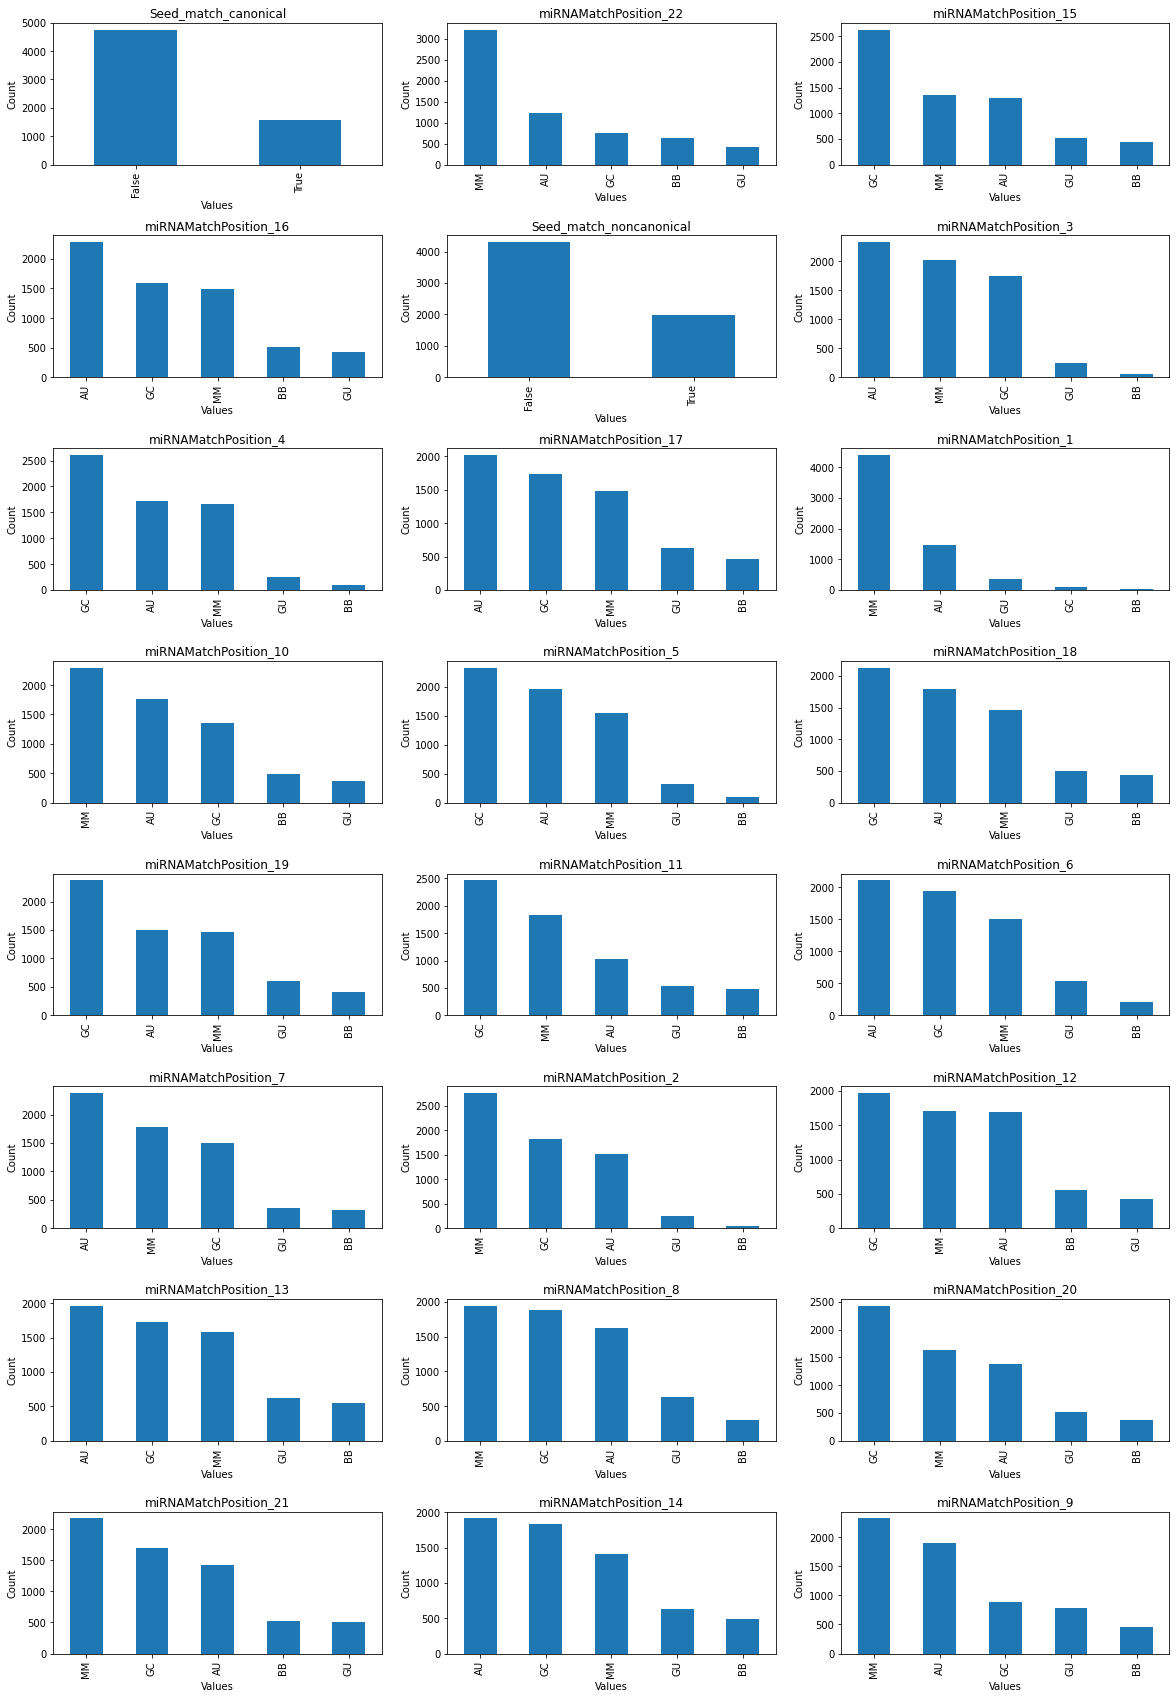

In [ ]:
fig, ax = plt.subplots(nrows=8, ncols=3)
i = 0
for column in x_train.select_dtypes(include="object"):
  x_train[column].value_counts().plot(ax = ax[i%8, i%3],kind="bar", figsize=(20,30), title=column, xlabel='Values', ylabel='Count')
  i += 1
plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()


**Counting in the training set how many samples there is for each label in order to see the balance between the labels in the set we are training the model on**

Text(0, 0.5, 'Count')

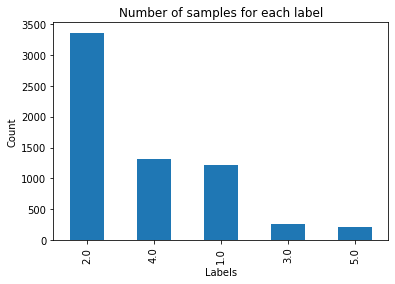

In [ ]:
pd.Series(y_train['label']).value_counts().plot(kind="bar")
plt.title("Number of samples for each label")
plt.xlabel('Labels')
plt.ylabel('Count')

In [ ]:
# In this plot we can see that the data the the model will train on is imbalanced, this can affect on its abilty to correctly classify a new sample to the label.
# Moreover, we will need to evalute the performance of the model with evaluation metrics that relevant to imbalanced data.

### Preprocessing (10 pts):
Describe in detail what did you do in the preprocessing phase and why you did it. 

***Write your code below***

In this chunk, We prepare to clean the training set and the testing set by droping id columns and union them. After that, We add id column in order to merge between them to categorical columns that we created:

In [ ]:
# Implement here
# Drop the column id in x_train:
x_train = x_train.drop("id", axis=1)
# Drop the column id in x_test:
x_test = x_test.drop("id", axis=1)
# Concatenate the DataFrames along the columns:
x_preprocessing = pd.concat([x_train, x_test])
# Create new column "id" in unioned dataframe:
x_preprocessing["id"] = [ind for ind in range(32260)]

In this chunk, We replace the NaN values for each column in two ways. 
First, we calculated the median number for float and integer columns.
Second, we calculated the most frequent word/digit for boolean and string columns (both to train and test sets):


In [ ]:
# Replace Nan's by median and most frequent word in the data:
arr = []
# Import median package:
from statistics import median
# For each column that is from type int or float:
for col in x_preprocessing.select_dtypes(include=['int', 'float']):
  # Remove the Nan values of this column (put only numbers to array):
  arr = x_preprocessing[col].dropna()
  # Calculate the median for an array of numbers:
  median_val = median(arr)
  # Fill the Nan values for ths column by the median value:
  x_preprocessing[col].fillna(median_val, inplace = True)

# For each column that is from type boolean or string:  
for col in x_preprocessing.select_dtypes(include=['object']):
  # Remove the Nan values of this column (put only words to array):
  arr = x_preprocessing[col].dropna().tolist()
  # Convert the array into series:
  s = pd.Series(arr)
  # Count the number of time each term appear in the array:
  counts = s.value_counts()
  # Take the term that has a maximal number of frequency:
  most_frequent_string = counts.idxmax()
  # Fill the Nan values by the most frequent word:
  x_preprocessing[col].fillna(most_frequent_string, inplace = True)

In this chunk, We work over a categorical columns. We seperate for each categorical column to all the categories columns when each category is 0 or 1 depend on if the category is writen in this specific row and column. If yes, so 1. If no, so 0 (both to train and test sets):

This called OneHotEncoder() when 1 of the categories for each column is 1 and other categories columns is 0. 
We don't use OrdinalEncoder() because we don't have order to the categories. 

Also, we can use pd.get_dummmies(x_preprossesing [categorical_col], prefix=col), and add there columns to original dataframe.

In [ ]:
# Get the categorical columns:
cat_vars = x_preprocessing.select_dtypes(include=['object'])
# Index of the categorial number:
i = 0
# Each column in cat_vars change to numeric with one hot encoding:
for col in cat_vars:
    # one hot encoding package:
    encoder = OneHotEncoder(handle_unknown='ignore')
    # Convert the columns into array with their values:
    array = x_preprocessing[col].values
    # Convert 1-d array into the 2-d array:
    array_2d = array.reshape(-1, 1)
    # Fit and transform the one hot package and convert it to array:
    one_hot_encoded_columns = encoder.fit_transform(array_2d).toarray()
    # Unique categories for each categorical column:
    categories = x_preprocessing[col].unique()
    # Make to dataframe the categories columns:
    one_hot_encoded_df = pd.DataFrame(one_hot_encoded_columns,columns=categories)
    # Rename the columns to ensure the column name unique:
    one_hot_encoded_df.rename(columns={"MM": f"MM_{i}", "AU": f"AU_{i}", "GC":f"GC_{i}","GU":f"GU_{i}","BB":f"BB_{i}"}, inplace=True)
    # Create a new id with a list of values in dataframe categories columns:
    one_hot_encoded_df['id'] = [ind for ind in range(32260)]
    # Merge the original dataframe with dataframe categories columns on id column:
    x_preprocessing = pd.merge(x_preprocessing, one_hot_encoded_df, on="id")
    # Drop from the merged dataframe the categorical column:
    x_preprocessing = x_preprocessing.drop(col, axis=1)
    # Add 1 to the index of categorical number:
    i += 1

In this chunk, we seperate again the merged train set and test set to train and test sets that are  after preprossesed data without nulls:

In [ ]:
# First 9055 rows are for the train set:
x_train_cat = x_preprocessing.iloc[:9055]
# Last row from 9055 are for the test set:
x_test_cat = x_preprocessing.iloc[9055:]

In this chunk, we merge between the x_train and y_train to get only the raws with labeled column that is not null in the training set: 

In [ ]:
# merge between x_train and y_train by 'id' column:
df_combined = pd.merge(x_train_cat, y_train, on='id')
# remove rows with null values in the 'label' column:
df_combined_train = df_combined.dropna(subset=['label'])
# remove the 'label' column:
df_combined_train = df_combined_train.drop('label', axis=1)

In this chunk, We prepare the data to the model that predict the labels in the test. We drop the column 'id' that say nothing about the prediction in our train and test data. Save only the column 'label' in the y_train that represent the label. In addition, we can to split the train data into train rows and test rows to check our model:
(In the end, the original test set goes to the compatiotion and training set uses to evaluate the model):

In [ ]:
# import the package split data:
from sklearn.model_selection import train_test_split
# X_train  = x_train.drop('id',axis=1)
# drop the column 'id' from our train set:
X = df_combined_train.drop('id',axis=1)
# save only labeled rows:
y_tst = y_train.dropna(subset=['label'])
# take the column 'label':
y_tst = y_tst['label']
# drop the 'id' column in our test data:
# X_test = x_test_cat.drop('id',axis=1)
# split the data to our internal checks:
X_train, X_test, y_train, y_test = train_test_split(X, y_tst, test_size=0.3, random_state=0)

In [ ]:
# Explain here
# Explaination about every step we did is above every chunk.

### Model training (10 pts):
Train your ML model.
Explain in detail what model you used to achieve your highest score, what the hyper-parameters were, and why did you choose both the model and these parameters.
Attach at least two learning plot and explain them.

***Write your code below***

In [ ]:
# Implement here
# import the model Light GBMC:
from lightgbm import LGBMClassifier

# create the model LGBMC:
model = LGBMClassifier(learning_rate=0.15,
                       n_estimators=400,
                       max_depth=66,
                       num_leaves=3000,
                       min_child_samples=35)

# Train the model using your training data:
train_model = model.fit(X_train, y_train)

# Test the model using our test data:
y_pred = train_model.predict(X_test)

LightGBM is an open-source gradient boosting framework that based on tree learning algorithm and designed to process data faster and provide better accuracy. It can handle large datasets with lower memory usage and supports distributed learning. In general, the LightGBM classifier is a gradient boosting algorithm that can be used for classification tasks. It is a popular choice for many machine learning tasks due to its efficiency and effectiveness.

The LGBMClassifier model in the lightgbm library allows you to specify various hyperparameters.

Here is a list of some of the hyperparameters of the LGBMClassifier model:

boosting_type: This specifies the type of boosting to use. LightGBM supports several types of boosting, including "gbdt" (Gradient Boosting Decision Tree), "dart" (Dropouts meet Multiple Additive Regression Trees), "goss" (Gradient-based One-Side Sampling), and "rf" (Random Forest).

num_leaves: This specifies the maximum number of leaves (terminal nodes) in a tree. A larger number of leaves can lead to a more complex model, but can also increase the risk of overfitting.

max_depth: This specifies the maximum depth of a tree. A deeper tree can lead to a more complex model, but can also increase the risk of overfitting.

learning_rate: This specifies the learning rate used for boosting. A smaller learning rate can lead to a more accurate model, but can also increase the training time.

n_estimators: This specifies the number of trees to use in the model. A larger number of trees can lead to a more accurate model, but can also increase the training time.

subsample: This specifies the fraction of the training data to use for each tree. A smaller subsample can lead to a faster training time, but can also increase the risk of overfitting.

colsample_bytree: This specifies the fraction of the features to use for each tree. A smaller fraction can lead to a faster training time, but can also increase the risk of overfitting.

reg_lambda: This specifies the L2 regularization term on the weights. A larger value can lead to a more robust model, which can be helpful in preventing overfitting.

The choice of hyperparameters can significantly impact the model's performance, so it is important to carefully select and tune them to achieve the best possible results. This can often be done through a process of "trial and error", using techniques such as grid search with the package from sklearn.model_selection import GridSearchCV or random search to find the optimal set of hyperparameters.

We choose hyperparameters in the "trial and error" approach at the grid search. We found that bigger number of leaves is more accurate the model is. Despite, to the number of minimal children in each conjuction that needs to be lower. In addition, of tuning the learning rate to get to the optimum of our function.

We choose this specific model because we tried a lot of different model with there hyperparameters and this model with this hyperparameters work the best for us.

**For Example Grid Search:** 

We tried this grid search to understand the model:

In [ ]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.1, 0.2, 0.3],
#     'num_leaves': [100, 1000, 3000],
#     'max_depth': [60, 70, 50]
# }

# # Create the LightGBM model
# lgb_model = lgb.LGBMClassifier()

# # Create the GridSearchCV object
# grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Make predictions on the test data
# predictions = best_model.predict(X_test)

# # Calculate the accuracy of the best model
# accuracy = accuracy_score(y_test, predictions)

# print('Best model accuracy:', accuracy)

**Attach two learning plot and explain them:**

*1. Learning Plot on the training sets (both accuracy and error rate):*

Run the lgbm model over each of the number of estimators that we defined (fit the model according the model that changed):

In [ ]:
from lightgbm import LGBMClassifier
n = [1,3,10,50,100,200,300,400]
models = []

for curr_size in n:
  # Create LGBM classifier object with current size of n:
  lgbm = LGBMClassifier(learning_rate=0.15,
                       n_estimators=curr_size,
                       max_depth=66,
                       num_leaves=3000,
                       min_child_samples=35)
  # Train LGBM classifier: 
  curr_model = lgbm.fit(X_train, y_train)
  models.append(curr_model)

Calculate the accuracy for each model that we bulid for the training set:

In [ ]:
accuracies_train = []
# Calculating accuracy score for train set:
for m in models:
  y_pred_train = m.predict(X_train)
  accuracies_train.append(accuracy_score(y_train, y_pred_train))

Calculate the accuracy for each model that we bulid for the testing set:

In [ ]:
accuracies_test = []
# Calculating accuracy score for test set:
for m in models:
  y_pred = m.predict(X_test)
  accuracies_test.append(accuracy_score(y_test, y_pred))

1. Plot the accuracy score over our learning plot graph:

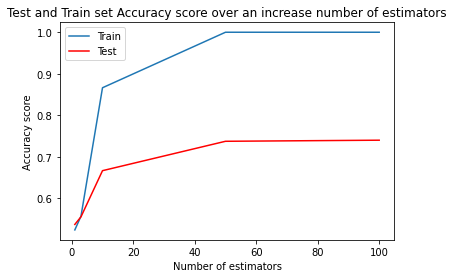

In [ ]:
# Plotting the accuracies scores of Test and Train sets:
plt.plot(n[:5], accuracies_train[:5], label = 'Train')
plt.plot(n[:5], accuracies_test[:5], label = 'Test', color = 'Red')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy score')
plt.title('Test and Train set Accuracy score over an increase number of estimators')
plt.legend()

plt.show()

**Explanation:**

As we can see, we can infer that the accuracy for the training set comes to 1 and the accuracy for testing set comes to 0.73. This means that in the training set it learned very well the samples and in the testing set the model doesn't learn so good samples. In addition, we can see that from n_estimators = 50 the plot is straight and limited in the highest score accuracy. Threfore, from this point no matter what the number of estimators we take we will get the same accuracy score. 

2. Calculate the errors and Plot the error score over learning plot graph:

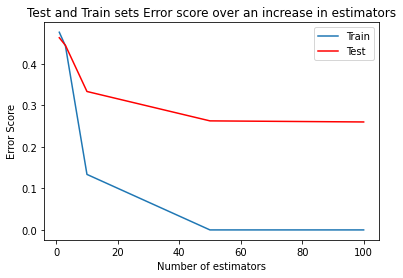

In [ ]:
error_test = [1-i for i in accuracies_test]
error_train = [1-i for i in accuracies_train]

# Plotting the accuracies scores of Test and Train sets:
plt.plot(n[:5], error_train[:5], label = 'Train')
plt.plot(n[:5], error_test[:5], label = 'Test', color = 'Red')
plt.xlabel('Number of estimators')
plt.ylabel('Error Score')
plt.title('Test and Train sets Error score over an increase in estimators')
plt.legend()

plt.show()

**Explanation:**

As we can see, we can infer that the error score for the training set comes to 0 and the accuracy for testing set comes to 0.27. This means that in the training set it learned with no error the samples (goes to overfit) and in the testing set there is an error that converges to value but the value bigger than the error on the training set . In addition, we can see that from n_estimators = 50 the plot is straight and limited in the lowest error. Threfore, from this point no matter what the number of estimators we take, we will get the same error score during our model. 

*Download the predicted labels for our competition:*

In [ ]:
# y_pred_id = list(range(0, len(y_pred)))
# df = pd.DataFrame({'id': y_pred_id, 'label': y_pred})
# df['label'] = pd.to_numeric(df['label'], downcast='integer')
# # Save the dataframe to a CSV file
# df.to_csv('sub.csv', index=False)

In [ ]:
# Explain here
# Explaination about every step we did is above every chunk and the explanatiotions about the learning plots is under every plot we did.

### Model evaluation (10 pts):
Eevaluate your ML model using different evaluation metrics.
For every evaluation metric mention below add your model score and answer the following questions:

What does this evaluation metric mean? is it relevant to this prediction task?
Do you think the score you got is good for this task?


***Write your code below***

In [ ]:
# Implement here
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Scores - ")
print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
print("Balanced Accuracy: " + str(balanced_accuracy_score(y_test, y_pred)))
print()
print("Precision Scores - ")
print("Micro Precision: " + str(precision_score(y_test, y_pred, average="micro")))
print("Macro Precision: " + str(precision_score(y_test, y_pred, average="macro")))
print("Weighted Precision: " + str(precision_score(y_test, y_pred, average="weighted")))
print()
print("Recall Scores - ")
print("Micro Recall: " + str(recall_score(y_test, y_pred, average="micro")))
print("Macro Recall: " + str(recall_score(y_test, y_pred, average="macro")))
print("Weighted Recall: " + str(recall_score(y_test, y_pred, average="weighted")))
print()
print("F1-score Scores - ")
print("Micro F1-score: " + str(f1_score(y_test, y_pred, average="micro")))
print("Macro F1-score: " + str(f1_score(y_test, y_pred, average="macro")))
print("Weighted F1-score: " + str(f1_score(y_test, y_pred, average="weighted")))


Accuracy Scores - 
Accuracy: 0.7627029858564693
Balanced Accuracy: 0.5768097440532027

Precision Scores - 
Micro Precision: 0.7627029858564693
Macro Precision: 0.8250181706676216
Weighted Precision: 0.767476679769236

Recall Scores - 
Micro Recall: 0.7627029858564693
Macro Recall: 0.5768097440532027
Weighted Recall: 0.7627029858564693

F1-score Scores - 
Micro F1-score: 0.7627029858564693
Macro F1-score: 0.6293109221215367
Weighted F1-score: 0.7351320671487344


In [ ]:
# List of evaluation metrics

# Accuracy - 0.762
# - Evaluation metric that measures the number of correct predictions made by a model in relation to the total number of predictions made. 
#   => (TP + TN)/(P + N)
# - This metric is relevant to this task because we need to know how many samples classified to their real class.
# - 0.762 Accuaracy score is good for this task because it says that 76.2% of our samples were classified to their correct class.

# Balanced Accuracy - 0.576
# - Evaluation metric that for each class measures the number of correct predictions made by a model in relation to the total number of predictions made for this class 
#   and divide the sum of this measures by the number of classes.
#   => (TPR + TNR)/2 when: TPR = TPR = TP / (TP + FN) & TNR = TN / (TN + FP)
# - This metric is relevant to this task because the classes in this task are imbalanced.
# - This metric score isn't good for this task because it says that only 57.6% of our samples were classified to their real class.

# Micro Precision - 0.762
# - Micro precision is a metric used to evaluate the performance of a classification model in terms of its ability to correctly predict the positive class. 
#   It is calculated by dividing the number of true positive predictions made by the model by the total number of positive predictions made by the model
#   => TP / (total number of positive predictions)
# - This metric is relevant to this task because the the data is imbalanced and this metric take into account the actual number of positive examples
#   rather than the total number of positive predictions made by the model.
# - This metric score is good for this this task because it means that, on average, the classifier is correctly predicting the positive class for 
#   approximately 76.2% of the positive predictions it makes. This can be interpreted as the classifier having a relatively high level of precision in its positive predictions.

# Micro Recall - 0.762
# - Micro recall is a metric used to evaluate the performance of a classification model in terms of its ability to correctly predict the positive class. 
#   It is calculated by considering the predictions made by the model for all classes as a whole.
#   => TP/ (TP + FN)
# - This metric is relevant to this task because the the data is imbalanced and micro recall metric take into account the number of true positive predictions
#   and relevant instances for each class. This can make them more appropriate for evaluating the performance of a classifier on imbalanced data, 
#   as they allow you to focus on the performance of the model on the minority class
# - This metric score is good for this this task because it means that, on average, the classifier is correctly predicting the positive class for approximately 76.2% of
#   the actual positive samples. This can be interpreted as the classifier having a relatively high level of recall, 
#   in the sense that it is able to identify a high proportion of the actual positive samples.

# Micro F1-score - 0.762
# - The micro F1-score is a metric used to evaluate the performance of a classifier or predictive model. It combines precision and recall into a single metric,
#   and is calculated as the harmonic mean of these two measures. this method calculate the Precision and Recall for all classes together.
#   => 2 * (Precision * Recall) / (Precision + Recall)
# - This metric is relevant to this task because the the data is imbalanced and micro F1-score is sensitive to the overall balance of the dataset,
#   and gives equal weight to each class, regardless of the number of instances in that class.
# - This metric score is good for this this task because it means that, on average, the classifier is achieving a relatively high level of balance
#   between its precision and recall, with the precision and recall being calculated using all of the positive and negative predictions made by the classifier.
#   This can be interpreted as the classifier having a relatively good performance overall.

# Macro Precision - 0.825
# - Macro precision is a metric used to evaluate the performance of a classification model in terms of its ability to correctly predict the positive class.
#   It is calculated by taking the average of the precision of the model on each class, rather than considering all classes as a whole.
#   => (TP1 + TP2 + ... + TPn) / n
# - This metric isn't relevant to this task because the the data is imbalanced and this metric take into account the total number of positive predictions made by the model
#   rather than the actual number of positive examples.
# - This metric score is good for this this task because it means that, on average, the classifier is correctly predicting the positive class for approximately 82.5% 
#   of the positive predictions it makes for each class. This can be interpreted as the classifier having a relatively high level of precision in its positive predictions for each class.

# Macro Recall - 0.576
# - Macro recall is a metric used to evaluate the performance of a classification model in terms of its ability to correctly predict the positive class.
#   It is calculated by taking the average of the recall of the model on each class, rather than considering all classes as a whole.
#   => (Recall for class 1 + Recall for class 2 + ... + Recall for class n) / n
# - This metric isn't relevant to this task because the the data is imbalanced and macro recall simply calculates the average recall across all classes,
#   regardless of the number of instances in each class. As a result, the performance of the model on the minority class can be overshadowed by the performance on the majority class.
# - This metric score isn't good for this task because it means that, on average, the classifier is correctly predicting the positive class for approximately 57.6% 
#   of the actual positive samples for each class. This can be interpreted as the classifier having a relatively low level of recall, in the sense that it is only able to 
#   identify a relatively small proportion of the actual positive samples for each class.

# Macro F1-score - 0.629
# - This metric is like micro F1-Score, but this method calculate the F1-Score for each class and gives an equal weight for each class
#  and divide the sum of this scores by the number of classes.
#  => (F1-score for class 1 + F1-score for class 2 + ... + F1-score for class n) / n
# - This metric isn't relevant to this task because the the data is imbalanced and macro F1-Score gives equal weight to each class, regardless of the number of instances in that class.
#   This means that the performance of the model on a minority class may be overshadowed by the performance on a majority class.
# - This metric score isn't good for this task because it means that , on average, the classifier is achieving a relatively low level of balance between its precision and 
#   recall for each class. This can be interpreted as the classifier having a relatively poor performance overall,
#   with the precision and recall being calculated separately for each class.

# Weighted Precision - 0.767
# - Weighted precision is a variant of the standard precision metric that is used to evaluate the performance of a classification model
#   in terms of its ability to correctly predict the positive class. It is calculated by weighting the precision of the model on each class by the number of examples in that class,
#   rather than considering all classes as a whole.
#   => (TP1*precision for class 1 + TP2*precision for class 2 + ... + TPn*precision for class n) / (total number of positive predictions)
# - This metric is relevant to this task because the the data is imbalanced and this metric take into account the actual number of positive examples
#   rather than the total number of positive predictions made by the model.
# - This metric score is good for this this task because it means that, on average, the classifier is correctly predicting the positive class for approximately 76.7% 
#   of the positive predictions it makes, with the average being weighted by the number of samples in each class. This can be interpreted as the classifier having a 
#   relatively high level of precision in its positive predictions, with the precision being weighted to account for the class balance.

# Weighted Recall - 0.762
# - Weighted recall is a variant of the standard recall metric that is used to evaluate the performance of a classification model. 
#   It is calculated by weighting the recall of the model on each class by the number of examples in that class, rather than considering all classes as a whole.
#   => (TP1*recall for class 1 + TP2*recall for class 2 + ... + TPn*recall for class n) / (total number of actual positive cases)
# - This metric is relevant to this task is relevant to this task because the data is imbalanced and this metric giving different 
#   weight for each class considering the number of samples of each class.
# - This metric score is good for this this task because it means that, on average, the classifier is correctly predicting the positive class for approximately 76.2%
#   of the actual positive samples, with the average being weighted by the number of samples in each class. This can be interpreted as the classifier having a 
#   relatively high level of recall, in the sense that it is able to identify a high proportion of the actual positive samples, 
#   with the recall being weighted to account for the class balance.

# Weighted F1-score - 0.735
# - This method is like micro F1-Score but it is calculated by taking the average F1-score across all classes, with each class weighted by the number of instances in that class.
#   => (number of instances in class 1*F1-score for class 1 +...+ number of instances in class n*F1-score for class n)/(number of instances in class 1+...+number of instances in class n)
# - This metric is relevant to this task is relevant to this task because the data is imbalanced and weighted F1-score takes into account the relative size of each class, 
#   and gives more weight to classes with a larger number of instances.This can be particularly important in imbalanced data sets, where the minority class is often the
#   one of most interest, and where the model's performance on the minority class may be more important than its performance on the majority class.
# - This metric score is good for this this task because it means that, on average, the classifier is achieving a relatively high level of balance between its precision and recall,
#   with the precision and recall being calculated for each class and the average being weighted by the number of samples in each class. 
#   This can be interpreted as the classifier having a relatively good performance overall, with the performance being weighted to account for the class balance.



### Explainability (10 pts):
Explain the results of your model using SHAP and attach relevant outputs. Explain at least three conclusions following the SHAP outputs.

**Note:**
Use the animal names in your conclusions and not the label numbers.

***Write your code below***

## SHAP
Shapely values (in simple words) are measures of contributions each predictor (feature) has in a machine learning model: (There is a lot of different plots in SHAP):

## 1. SHAP Summary Plot:
SHAP values of a model’s output explain how features impact the output of the model:

In [ ]:
try:
  import shap
except ImportError as e:
  %pip install shap
finally:
  import shap

# Create object that can calculate shap values:
explainer = shap.TreeExplainer(train_model)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 30.2 MB/s 


In [ ]:
# Calculate the value of the shap:
shap_values = explainer.shap_values(X)

Now we can plot relevant plots that will help us analyze the model:
Fly (label 1), Cow (label 2), Human (label 3), Mouse (label 4), Worm (label 5):



In [ ]:
class_names = ['Fly', 'Cow', 'Human', 'Mouse', 'Worm']

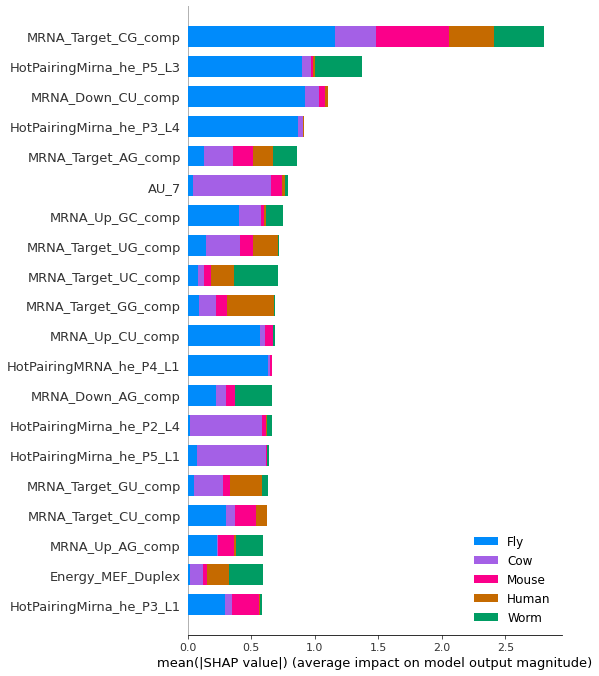

In [ ]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= class_names, feature_names = X.columns)

In this plot, the impact of a feature on the classes is stacked to create the feature importance plot. Thus, if you created features in order to differentiate a particular class from the rest, that is the plot where you can see it. In other words, the summary plot for multiclass classification can show you what the machine managed to learn from the features.

In this example, we can see that the class Fly hardly uses the features Target_CG_comp, Down_CU_comp, and HotPairingMirna_he_P5_L3. We can also see that the classes Cow hardly uses the features Target_CG_comp, AU_7, HotPairingMirna_he_P5_L1 and HotPairingMirna_he_P2_L4. 
The class Human is used in all the features, but the class doesn't so big. For example, it is used hardly in the features Target_GG_comp and Target_GU_comp but in feature Up_AG_comp it not found at all. 
Two classes Mouse and Worm uses less than the others as we can see in all the features. That is the reason why the data is unbalanced. In order to balance the data we need to generate new features that uniquely be dedicated towards these classes.

## 2. SHAP Dependent Plot:

The partial dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. partial dependence plot can show whether the relationship between the target and a feature is linear, monotonic, or more complex.

The partial dependence plot is a global method: The method considers all instances and gives a statement about the global relationship of a feature with the predicted outcome. The PDP assumes that the first feature is not correlated with the second feature. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible.

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. In this example, we see the affect of "Acc_P10_10th" feaure on the model (the points). In addition, the affect of other feature "MIRNA_Up_CU_comp" on him by coloring corresponds to a second feature that may have an interaction effect with the feature we are plotting (by default this second feature is chosen automatically).

In this scatter plot, each dot is a single prediction (row) from the dataset.
The x-axis is the actual value from the dataset.
The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction:

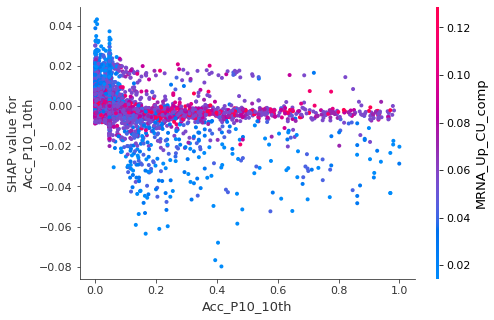

In [ ]:
shap.dependence_plot(0, shap_values[0], X.values, feature_names=X.columns)

In the bottom line, this shape plot shows us the impact of one of the feature on the whole model by his values and his direction for each sample. For example, when the shap value lower than 0 we understand that this feature is decrease the sample and the value of the shap value shows how many it increase or decrease this sample. In addition, we see the relationship between two features that shows their correlation in the model by coloring (amount of impact) and how much their impact one on another by the value behind the scale. 

## 3. SHAP Force Plot:
Force plot gives us the explainability of a single model prediction. In this plot, we can see how features contributed to the model’s prediction for a specific observation. It is very convenient to use for error analysis or a deep understanding of a particular case.

Red color indicates features that are pushing the prediction higher, and blue color indicates just the opposite:

In [ ]:
i=10
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

From the plot we can see (we took the first sample):

1. The model predict_proba value: -11.12
2. The base value: this is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (explainer.expected_value in the code). In this example base value = -6.872.
3. The numbers on the plot arrows are the value of the feature for this instance. For example, HotPairingMRNA_he_P4_L1 = 1 and HotPairingMirna_he_P5_L3 = 1.
4. Red represents features that pushed the model score higher, and blue representing features that pushed the score lower.
5. The bigger the arrow, the bigger the impact of the feature on the output. The amount of decrease or increase in the impact can be seen on the x-axis. 
 
In the bottom line, this shape plot shows us the impact of the feateres by their values and their direction on one specific row/sample. For example, HotPairingMRNA_he_P4_L1 of 1 increases the expected value of this row the most, and on the other side HotPairingMirna_he_P5_L3 of 1, reduce the expected value the most on this specific sample.

## 4. SHAP waterfall Plot:
The waterfall plot is another local analysis plot of a single instance prediction. Let’s take instance number 10 as an example:

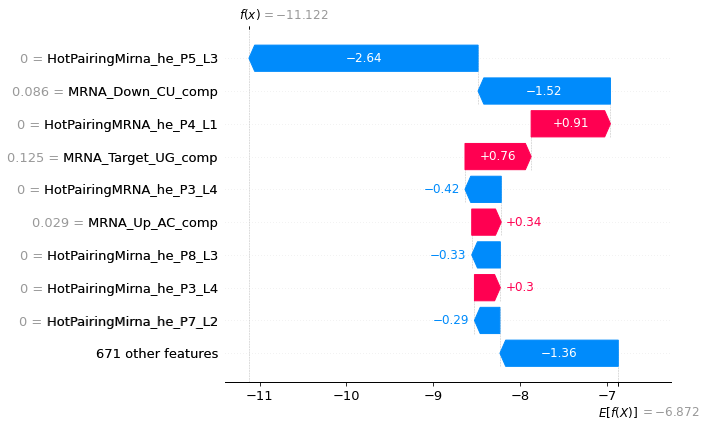

In [ ]:
row = 10
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                  base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                      feature_names=X_test.columns.tolist()))

1. f(x) is the model predict_proba value: -11.122.
2. E[f(x)] is the base value = -6.872.
3. On the left are the features value and on the arrows the feature contribution to the prediction.
4. Each row shows how the positive (red) or negative (blue) contribution of each feature moves the value from the expected model output over the background dataset to the model output for this prediction. In other words, increase or decrease the expected value of a specific sample.

In the bottom line, this shape plot shows us the impact of the features by their values and their direction on one spesific sample. For example, HotPairingMRNA_he_P4_L1 of 0.91 increases the expected value of this row the most, and on the other side HotPairingMirna_he_P5_L3 of 2.63, decrease the expected value the most.

In [ ]:
# Explain here
# Explaination about every plot we did is above and under every SHAP plot.

### Competition rank (10 pts):
The competition will end on 29.12 at 23:59. The results of the competition will be published about 12 hours later under the private tab on the leaderboard.

The scoring of this section is relative to the location (between 0-10 pts).

Indicate here your team name in the competition and **attach an additinal notebook\python code** with which we can reproduce the rank you received.


In [ ]:
# My team name was: MY